In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Информация об атрибутах: 
> 1. ### возраст 
> 2. ### пол 
> 3. ### тип боли в груди (4 значения) 
> 4. ### артериальное давление в покое 
> 5. ### уровень холесторальной сыворотки в мг / дл 
> 6. ### уровень сахара в крови натощак> 120 мг / дл 
> 7. ### результаты электрокардиографии в покое (значения 0,1,2) 
> 8. ### максимальная достигнутая частота сердечных сокращений 
> 9. ### стенокардия, вызванная физической нагрузкой 
> 10. ### oldpeak = депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом 
> 11. ### наклон пика сегмента ST при физической нагрузке 
> 12. ### число крупных сосудов (0-3), окрашенных при флюороскопии 
> 13. ### талассемия: 3 = нормальное; 6 = исправленный дефект; 7 = обратимый дефект


In [4]:
data = pd.read_csv('heart_new.csv')
data.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,reversable defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,reversable defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,reversable defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,reversable defect,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null object
chest_pain_type            303 non-null object
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null object
rest_ecg                   303 non-null object
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null object
st_depression              303 non-null float64
st_slope                   303 non-null object
num_major_vessels          303 non-null int64
thalassemia                303 non-null object
target                     303 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 33.2+ KB


In [6]:
print(data.shape)

(303, 14)


In [8]:
print(data.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')


In [9]:
data.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


In [10]:
data.describe(include='object')

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
count,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,3
top,male,typical angina,lower than 120mg/ml,ST-T wave abnormality,no,downsloping,reversable defect
freq,207,143,258,152,204,142,283


In [11]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

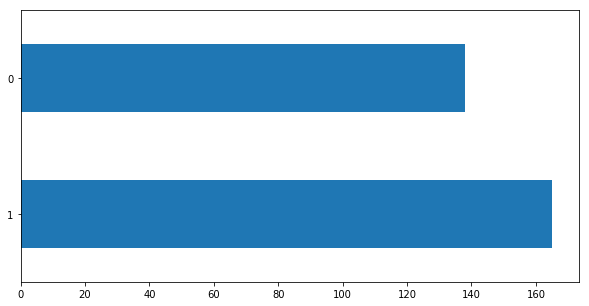

In [14]:
plt.figure(figsize=(10, 5))
data['target'].value_counts().plot(kind='barh')
plt.show()

In [17]:
data.sort_values(by='age', ascending=False)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
238,77,male,typical angina,125,304,lower than 120mg/ml,normal,162,yes,0.0,downsloping,3,reversable defect,0
144,76,female,non-anginal pain,140,197,lower than 120mg/ml,left ventricular hypertrophy,116,no,1.1,flat,0,reversable defect,1
129,74,female,atypical angina,120,269,lower than 120mg/ml,normal,121,yes,0.2,downsloping,1,reversable defect,1
151,71,female,typical angina,112,149,lower than 120mg/ml,ST-T wave abnormality,125,no,1.6,flat,0,reversable defect,1
60,71,female,non-anginal pain,110,265,greater than 120mg/ml,normal,130,no,0.0,downsloping,1,reversable defect,1
25,71,female,atypical angina,160,302,lower than 120mg/ml,ST-T wave abnormality,162,no,0.4,downsloping,2,reversable defect,1
240,70,male,non-anginal pain,160,269,lower than 120mg/ml,ST-T wave abnormality,112,yes,2.9,flat,1,reversable defect,0
145,70,male,atypical angina,156,245,lower than 120mg/ml,normal,143,no,0.0,downsloping,0,reversable defect,1
225,70,male,typical angina,145,174,lower than 120mg/ml,ST-T wave abnormality,125,yes,2.6,upsloping,0,reversable defect,0
234,70,male,typical angina,130,322,lower than 120mg/ml,normal,109,no,2.4,flat,3,reversable defect,0


In [18]:
data['target'].mean()

0.5445544554455446

In [19]:
data[data['target'] == 1].mean()

age                         52.496970
resting_blood_pressure     129.303030
cholesterol                242.230303
max_heart_rate_achieved    158.466667
st_depression                0.583030
num_major_vessels            0.363636
target                       1.000000
dtype: float64

In [22]:
data[(data['rest_ecg'] == 'normal') & (data['target'] == 1)].shape[0]

68

In [23]:
data.loc[0:5]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,reversable defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,reversable defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,reversable defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,reversable defect,1
5,57,male,typical angina,140,192,lower than 120mg/ml,ST-T wave abnormality,148,no,0.4,flat,0,fixed defect,1
